In [106]:
import pandas as pd
import numpy as np
import skbio
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from matplotlib import rcParams
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from statsmodels.stats.multicomp import MultiComparison
#dunns
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng
import warnings

import plotly.express as px
import plotly.graph_objects as go
import os
import re
from plotly.subplots import make_subplots

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.api as sm

import statsmodels.api as sa
import scikit_posthocs as sp

from statannot import add_stat_annotation

from pingouin import kruskal

rcParams.update({'figure.autolayout': True})

In [107]:
finaldate = '22.6.21'

In [108]:
if not os.path.exists(f'../../../../../data/plots/luminescence/TRAMP'):
    os.mkdir(f'../../../../../data/plots/luminescence/TRAMP/')
if not os.path.exists(f'../../../../../data/plots/luminescence/TRAMP/{finaldate}'):
    os.mkdir(f'../../../../../data/plots/luminescence/TRAMP/{finaldate}')

In [109]:
luminescence_raw_date = f'../../../../../data/luminescence/TRAMP/{finaldate}/output_raw.csv'
#luminescence_raw_date2 = f'../../../../data/luminescence/to_be_sorted/{finaldate}/output_raw_{date2}.csv'

In [110]:
luminescence_raw_df_date = pd.read_csv(luminescence_raw_date, header=0)


In [111]:
luminescence_raw_df_date

,Well,content,luminescence,well_row,well_col,name,mean_luminescence_pico,corrected_luminescence,date
0,A01,1.0,262427.0,A,1,positive_control,31276.000000,8.390683,22.6.21
1,B01,2.0,2398.0,B,1,negative_control,12415.000000,0.193153,22.6.21
2,C01,3.0,2789.0,C,1,ARF18#1,15066.333333,0.185115,22.6.21
3,D01,4.0,2617.0,D,1,ARF9#4,11164.666667,0.234400,22.6.21
4,E01,5.0,3270.0,E,1,TGA1#2,6777.000000,0.482514,22.6.21
5,F01,6.0,11498.0,F,1,NIR1#13,7209.000000,1.594951,22.6.21
6,G01,7.0,1524.0,G,1,ANAC032#2,7334.333333,0.207790,22.6.21
7,H01,8.0,1986.0,H,1,ANR1#1,9694.000000,0.204869,22.6.21
8,A02,9.0,181430.0,A,2,positive_control,31276.000000,5.800934,22.6.21
9,B02,10.0,3003.0,B,2,negative_control,12415.000000,0.241885,22.6.21


In [112]:
#rename name column to probe
luminescence_raw_df_date.rename(columns={'name':'probe'}, inplace=True)
#add TF column
luminescence_raw_df_date['TF'] = 'ARF18'

In [113]:
# def add_probe_column(df,promoter_number,promoter):
#     df.loc[df.name.str.match(fr'(^{promoter_number}.*)')==True, 'Probe'] = promoter
    

In [114]:
# #add TF coexpression column
# def add_tf_column(df, TF_number, TF):
#     """function to add TF added column based on an input df, a TF_number and a TF name"""
#     df.loc[df.name.str.contains(fr'.*{TF_number}.*')&df.TF_added.isnull()==True, 'TF_added'] = TF
#     for index, value in df.loc[df.name.str.contains(fr'.*{TF_number}.*')&df.TF_added.notnull()].TF_added.items():
#         if re.match(fr'.*{TF}.*', value):
#             pass
#         else:
#             df.iloc[index, df.columns.get_loc('TF_added')] = f'{value}+{TF}'


In [115]:
luminescence_raw_df_date.probe.unique()

array(['positive_control', 'negative_control', 'ARF18#1', 'ARF9#4',
       'TGA1#2', 'NIR1#13', 'ANAC032#2', 'ANR1#1', 'ARF9#3', 'NLP7#11'],
      dtype=object)

In [116]:
luminescence_raw_df = luminescence_raw_df_date.copy()

In [117]:
# #merge the dfs with different dates
# luminescence_raw_df = pd.concat([luminescence_raw_df_date1,luminescence_raw_df_date2],ignore_index=True)
# luminescence_raw_df

In [118]:
#sort rows by the custom probe order I want so plots are in the correct order
luminescence_raw_df.probe = pd.Categorical(luminescence_raw_df.probe,
                                              ['positive_control','negative_control','ANR1#1','ANAC032#2','ARF9#3','ARF9#4','ARF18#1','NIR1#13','NLP7#11','TGA1#2',])
luminescence_raw_df = luminescence_raw_df.sort_values("probe")

In [119]:
luminescence_raw_df.probe

0     positive_control
16    positive_control
8     positive_control
1     negative_control
17    negative_control
9     negative_control
23              ANR1#1
15              ANR1#1
7               ANR1#1
22           ANAC032#2
14           ANAC032#2
6            ANAC032#2
28              ARF9#3
26              ARF9#3
24              ARF9#3
11              ARF9#4
19              ARF9#4
3               ARF9#4
18             ARF18#1
10             ARF18#1
2              ARF18#1
13             NIR1#13
5              NIR1#13
21             NIR1#13
27             NLP7#11
29             NLP7#11
25             NLP7#11
4               TGA1#2
12              TGA1#2
20              TGA1#2
Name: probe, dtype: category
Categories (10, object): [positive_control, negative_control, ANR1#1, ANAC032#2, ..., ARF18#1, NIR1#13, NLP7#11, TGA1#2]

In [120]:
#save as file
location = f'../../../../../data/luminescence/TRAMP/{finaldate}/combined_output.tsv'

luminescence_raw_df.to_csv(location,sep='\t',header=True)

In [121]:
# #set style to ticks
# sns.set(style="ticks", color_codes=True)

In [122]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly import tools

# trace1 = Bar(
#     x=['giraffes', 'orangutans', 'monkeys'],
#     y=[20, 14, 23],
#     name='SF Zoo'
# )
# trace2 = Bar(
#     x=['giraffes', 'orangutans', 'monkeys'],
#     y=[12, 18, 29],
#     name='LA Zoo'
# )
# trace3 = Scatter(
#   x=['giraffes', 'orangutans', 'monkeys']
#   ,y=[33,20,17]
#   ,name='subplots ftw'
#   )


# fig = tools.make_subplots(rows=2, cols=1, shared_xaxes=True)

# fig.append_trace(trace3, 1,1)
# fig.append_trace(trace1, 2, 1)
# fig.append_trace(trace2,2,1)


# fig['layout'].update(height=600, width=600)
# iplot(fig)

In [123]:
# # df = luminescence_raw_df.sort_values("Promoter")
# fig = make_subplots(rows=1, cols=2,shared_xaxes=True)
# trace1 = px.bar(df, y=df[df.Promoter=='NOS'].corrected_luminescence, x=df[df.Promoter=='NOS'].Promoter)
# fig.append_trace(trace1,1, 1)
# fig['layout'].update(height=600, width=600)

In [124]:
# df = luminescence_raw_df.sort_values("Promoter")
# trace1 = px.bar(df, y=df[df.Promoter=='NOS'].corrected_luminescence, x=df[df.Promoter=='NOS'].Promoter)
# fig.add_trace(trace1.data[0])
# fig['layout'].update(height=600, width=600)
# fig.show()

In [125]:
# #layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )

# fig = px.bar(luminescence_raw_df.sort_values("Promoter"), y="corrected_luminescence",barmode='group', x="Promoter", color="TF_added",  hover_data=luminescence_raw_df.columns) #points="all"

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
# fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
# fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean_luminescence')
# #write to file static image and interactive one
# #fig.write_image(f'../../../../data/plots/luminescence/{date}/violin23.9.19.pdf')
# #fig.write_html(f'../../../../data/plots/luminescence/{date}/violin23.9.19.html')

# fig.show()

In [126]:
# #layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
# fig = px.violin(luminescence_raw_df.sort_values("Promoter"), y="corrected_luminescence", x="Promoter", color="TF_added", box=True, hover_data=luminescence_raw_df.columns) #points="all"

# fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')
# fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
# fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean_luminescence')
# #write to file static image and interactive one
# #fig.write_image(f'../../../../data/plots/luminescence/{date}/violin23.9.19.pdf')
# #fig.write_html(f'../../../../data/plots/luminescence/{date}/violin23.9.19.html')

# fig.show()

In [127]:

# fig = go.Figure()
# df = luminescence_raw_df.sort_values("Promoter")
# fig.add_trace(go.Violin(x=df['Promoter'][ df['condition'] == '10 mM KNO3 in W5' ],
#                         y=df['nluc/fluc'][ df['condition'] == '10 mM KNO3 in W5' ],
#                         legendgroup='10 mM KNO3 in W5', scalegroup='10 mM KNO3 in W5', name='10 mM KNO3 in W5',
#                         line_color='blue')
#              )
# fig.add_trace(go.Violin(x=df['Promoter'][ df['condition'] == 'W5' ],
#                         y=df['nluc/fluc'][ df['condition'] == 'W5' ],
#                         legendgroup='W5', scalegroup='W5', name='W5',
#                         line_color='orange')
#              )

# fig.update_traces(box_visible=True, meanline_visible=True)
# fig.update_layout(violinmode='group')
# fig.show()


In [128]:
# df = luminescence_raw_df.sort_values("Promoter")
# #set figure size

# sns.set(rc={'figure.figsize':(8,6)}, style="ticks", color_codes=True)
# #bar chart, 95% confidence intervals
# plot = sns.barplot(x="TF_added", y="corrected_luminescence",hue='Promoter',data=df, ci=95, capsize=0.1,errwidth=0.7,n_boot=10000,
#                    )
# plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
# #plt.legend(loc='upper right', borderaxespad=0.)
# plt.ylabel("Mean_luminescence") #.get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence.pdf', format='pdf')

In [129]:
# plot = sns.catplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, hue='condition', kind='violin',
#                    order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)'])
# #plot points
# [plt.setp(ax.get_xticklabels(), rotation=45, ha='right') for ax in plot.axes.flat]

# #ax = sns.swarmplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, color=".25",
#              #      order=['NOS','STAP4','NIR1(1000bp)','ANAC032(1000bp)','ANR1(500bp)','ANR1(1000bp)', 'ARF18(500bp)','ARF18(1000bp)', 'DREB26(500bp)', 'DREB26(1000bp)','NLP7(500bp)', 'NLP7(1000bp)']).get_figure().savefig(f'../../../../data/plots/luminescence/{date}/luminescence_violin.pdf', format='pdf')


In [130]:
luminescence_raw_df

,Well,content,luminescence,well_row,well_col,probe,mean_luminescence_pico,corrected_luminescence,date,TF
0,A01,1.0,262427.0,A,1,positive_control,31276.000000,8.390683,22.6.21,ARF18
16,A03,17.0,244104.0,A,3,positive_control,31276.000000,7.804834,22.6.21,ARF18
8,A02,9.0,181430.0,A,2,positive_control,31276.000000,5.800934,22.6.21,ARF18
1,B01,2.0,2398.0,B,1,negative_control,12415.000000,0.193153,22.6.21,ARF18
17,B03,18.0,2825.0,B,3,negative_control,12415.000000,0.227547,22.6.21,ARF18
9,B02,10.0,3003.0,B,2,negative_control,12415.000000,0.241885,22.6.21,ARF18
23,H03,24.0,16605.0,H,3,ANR1#1,9694.000000,1.712915,22.6.21,ARF18
15,H02,16.0,5095.0,H,2,ANR1#1,9694.000000,0.525583,22.6.21,ARF18
7,H01,8.0,1986.0,H,1,ANR1#1,9694.000000,0.204869,22.6.21,ARF18
22,G03,23.0,1342.0,G,3,ANAC032#2,7334.333333,0.182975,22.6.21,ARF18


In [131]:
#save table
luminescence_raw_df.to_csv(f'../../../../../data/plots/luminescence/TRAMP/{finaldate}/luminescence_raw_df.csv', header=1)



In [132]:
# #add plus sign to TF column if not 'No TF)
# luminescence_raw_df_renamed = luminescence_raw_df.copy()

# filter = luminescence_raw_df_renamed[~luminescence_raw_df_renamed.gene_type.str.contains('No TF')]
# filter.gene_type = '+' + filter.gene_type.astype('str')
# filter



In [133]:
# luminescence_raw_df_renamed = luminescence_raw_df.copy()
# luminescence_raw_df_renamed.gene_type.replace('NLP7+TCP20','+NLP7+TCP20', inplace=True)
# # luminescence_raw_df_renamed.gene_type.replace('ANR1','+ANR1', inplace=True)
# luminescence_raw_df_renamed.gene_type.replace('randCont','random', inplace=True)


In [134]:
# #get TF names
# pd.Categorical(luminescence_raw_df.TF_added)
# names = luminescence_raw_df.TF_added.unique()
# #Change TF names to +TF
# luminescence_raw_df_renamed = luminescence_raw_df.copy()
# for TF in names:
#     if TF != 'No TF':
#         luminescence_raw_df_renamed.TF_added.replace(TF,f'+{TF}', inplace=True)
# luminescence_raw_df = luminescence_raw_df_renamed

In [135]:
### get names of each TF_added for later

In [136]:
# pd.Categorical(luminescence_raw_df.TF_added)
# names = luminescence_raw_df.TF_added.unique()
# for name in names:
#     print(name)

In [137]:
#get list of probes
pd.Categorical(luminescence_raw_df.probe)
probe_names = luminescence_raw_df.probe.unique()
for name in probe_names:
    print(name)

positive_control
negative_control
ANR1#1
ANAC032#2
ARF9#3
ARF9#4
ARF18#1
NIR1#13
NLP7#11
TGA1#2


In [138]:
#create colours
from random import randint
color = []
n = len(probe_names)
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
print(color)


['#8A8B74', '#D2BF45', '#52BBD8', '#7A5C68', '#6A610B', '#202D1F', '#13F9F6', '#BB0003', '#81199C', '#D34A91']


In [139]:
#make dictionary with TF_added names as key and the randomly generated colors as values
new_color = dict(zip(probe_names, color))
new_color

{'positive_control': '#8A8B74',
 'negative_control': '#D2BF45',
 'ANR1#1': '#52BBD8',
 'ANAC032#2': '#7A5C68',
 'ARF9#3': '#6A610B',
 'ARF9#4': '#202D1F',
 'ARF18#1': '#13F9F6',
 'NIR1#13': '#BB0003',
 'NLP7#11': '#81199C',
 'TGA1#2': '#D34A91'}

In [140]:
for probe in probe_names:
    print(probe)

positive_control
negative_control
ANR1#1
ANAC032#2
ARF9#3
ARF9#4
ARF18#1
NIR1#13
NLP7#11
TGA1#2


In [141]:
df = luminescence_raw_df.copy()

In [142]:
#check column types
df.dtypes

Well                        object
content                    float64
luminescence               float64
well_row                    object
well_col                     int64
probe                     category
mean_luminescence_pico     float64
corrected_luminescence     float64
date                        object
TF                          object
dtype: object

In [143]:
#Make probe object
df.probe = df.probe.astype(object)

In [144]:
df.dtypes

Well                       object
content                   float64
luminescence              float64
well_row                   object
well_col                    int64
probe                      object
mean_luminescence_pico    float64
corrected_luminescence    float64
date                       object
TF                         object
dtype: object

In [145]:
probe_names = df.probe.unique()
for name in probe_names:
    print(name)

positive_control
negative_control
ANR1#1
ANAC032#2
ARF9#3
ARF9#4
ARF18#1
NIR1#13
NLP7#11
TGA1#2


In [146]:
probe_names

array(['positive_control', 'negative_control', 'ANR1#1', 'ANAC032#2',
       'ARF9#3', 'ARF9#4', 'ARF18#1', 'NIR1#13', 'NLP7#11', 'TGA1#2'],
      dtype=object)

In [147]:
#reset index
df.reset_index(drop=True, inplace=True)

[('negative_control', 'positive_control'), ('negative_control', 'ANR1#1'), ('negative_control', 'ANAC032#2'), ('negative_control', 'ARF9#3'), ('negative_control', 'ARF9#4'), ('negative_control', 'ARF18#1'), ('negative_control', 'NIR1#13'), ('negative_control', 'NLP7#11'), ('negative_control', 'TGA1#2')]
[0.00245906 0.01100423 0.0302752 ]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

positive_control v.s. negative_control: Custom statistical test, P_val:2.459e-03
negative_control v.s. ARF9#3: Custom statistical test, P_val:1.100e-02
negative_control v.s. TGA1#2: Custom statistical test, P_val:3.028e-02


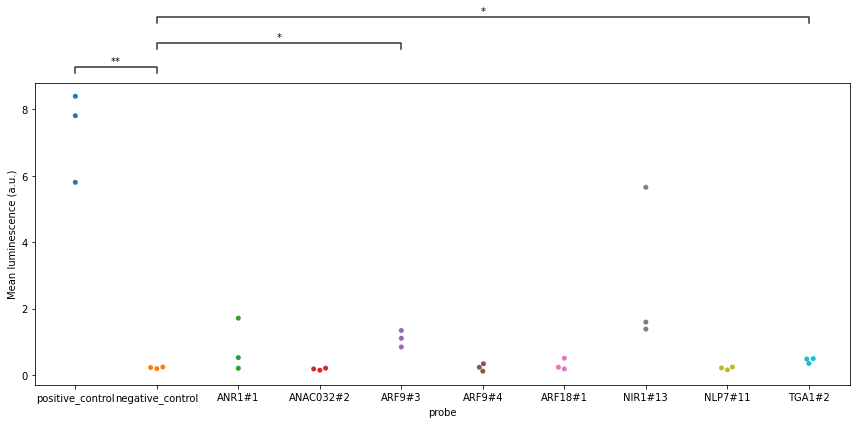

In [157]:
#layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)' )
#make graphs for each promoter
#color_discrete_map = {'red': 'red', 'blue': 'blue', 'orange': 'orange', 'purple':'purple','green':'green','yellow':'yellow','brown':'brown','black':'black'}
#plots for promoters 2 Tf categories

# for probe in probe_names:
#     # if probe == 'NOS' or probe == 'minimal_STAP4' or probe is '2x[bZIP3-random-NRE-random]' or probe is '2x[TGA1-random-NRE-random]' or probe is '4xNRE' or prom is 'UBQ10' or prom is '3xHHO2-minsyn_105':
#     #     pass
#     # else:
#     #     df = luminescence_raw_df[luminescence_raw_df.Promoter == probe].sort_values("TF", ascending=False)
#     #     TFs =  df.TF.unique()
#     #     print(prom)
#     #     print(TFs)
#     #     if len(TFs) is not 2:
#     #         pass
#     #     else:
plt.figure(figsize=(12, 6))
order = [probe_names]
fig = sns.swarmplot(x='probe', y='corrected_luminescence', data=df)

#             # fig = sns.catplot(
#             #     x='TF_added',
#             #     y='corrected_luminescence',
#             #     data=df,
#             #     kind='violin',
#             #     order=order,            
#             #     cut=0,
#             #     legend=False,
            #     #color=new_color
            # )
            
            #fig = px.violin(df, x='TF_added',
            #                         y='corrected_luminescence', box=True,                       
            #                      color='TF_added', color_discrete_map=new_color,violinmode='overlay',order=order) #points="all"

            #fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)', title=prom,autosize=True)
            #fig.update_xaxes(showline=True, linewidth=1, linecolor='black',ticks="outside")
            #fig.update_yaxes(showline=True, linewidth=1, linecolor='black',ticks="outside", title_text='Mean luminescence (a.u.)')
            #hide legend
            #fig.layout.update(showlegend=False)
            # add significance if necessary - dunn's posthocs with multiple Bonferroni correction
            #stat = dunn_posthoc_test(df, 'corrected_luminescence', 'TF_added')
# label box pairs
box_pairs = []
for probe in probe_names:
    if probe == 'negative_control':
        pass
    else:
        box_pairs.append(('negative_control',probe))
print(box_pairs)
# make empty list of p_values
p_values = []
#run t-tests
#make new box_pairs significant dict
box_pairs_all_pvalues = {}
for pair in box_pairs:
    #create series objects
    probe1 = df.query(f'probe == "{pair[0]}"')['corrected_luminescence']
    probe2 = df.query(f'probe == "{pair[1]}"')['corrected_luminescence']
   # probe1 = df.loc[df['probe'] == pair[0], corrected_luminescence]
   # probe2 = df.loc[df['probe'] == pair[1], corrected_luminescence]
    results = stats.ttest_ind(probe1, probe2)
    #append pvalue to dict
    box_pairs_all_pvalues[pair] = results.pvalue
   # box_pairs_significant.append(pair)
   # p_values.append(results.pvalue)
#filter dict by significance and put in a new dictionary
box_pairs_significant = {}
for k,v in box_pairs_all_pvalues.items():
    if v <0.05:
        box_pairs_significant[k] = v

#correct p_values for multipletests using Bonferroni correction. Alpha = 0.05
reject_null,pvals_corrected,alpha_sidak,alpha_bonferroni = multipletests(list(box_pairs_significant.values()), method='bonferroni')
print(pvals_corrected)
# def ttest_run(c1, c2):
#     results = stats.ttest_ind(c1, c2)
#     df = pd.DataFrame({'categ1': c1,
#                        'categ2': c2,
#                        'tstat': results.statistic,
#                        'pvalue': results.pvalue}, 
#                        index = [0])    
#     return df
# df_list = [ttest_run(i, j) for i, j in box_pairs]
# final_df = pd.concat(df_list, ignore_index = True)
# print(final_df)

# populate the list of p_values according to the box_pairs
# for pair in box_pairs:
#     print(pair)
#     # select p value for each pair
#     p = stat.loc[pair[0], pair[1]]
#     p_values.append(
# add stats annotation to the plot
add_stat_annotation(
    fig,
    data=df,
    x='probe',
    y='corrected_luminescence',    
    box_pairs=list(box_pairs_significant.keys()),
    text_format="star",
    loc="outside",
    verbose=2,
    perform_stat_test=False,
    pvalues=pvals_corrected,
    #test='t-test_ind',
)
# change axes labels
plt.ylabel('Mean luminescence (a.u.)')
#plt.xlabel(x_label)
# tight layout
plt.tight_layout()
# save figure

plt.savefig(
    f'../../../../../data/plots/luminescence/TRAMP/{finaldate}/scatter.pdf',
    format="pdf",
    bbox_inches="tight",
)           


        #write to file static image and interactive one
       # fig.write_image(f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.pdf', width=500, height=350, scale=5)
      #  fig.write_html(f'../../../../data/plots/luminescence/{finaldate}/violin{prom}.html')
      #  fig.show()